In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Parte 1: Sistemas

**Ejercicio 1:** Para cada uno de los siguientes sistemas determine si son:

causales, 

lineales,

invariantes en el tiempo 

y si poseen memoria. 

En cada caso grafique la salida del sistema $y[n]$ para una entrada dada.


1. $y[n] = g[n]x[n]$, donde $g[n] = A \sin(\omega n T)$ siendo $A$ constante, $\omega = 2\pi f$ y $T$ el período de muestreo.

✔ Causal: la salida y[n]y[n] depende sólo del valor actual de x[n]x[n].

✔ Lineal: es una multiplicación, cumple superoposicion.

❌ Invariante: se desplaza solo x[n] y g[n] no se desplaza, solo se multiplica.

❌ No posee memoria.



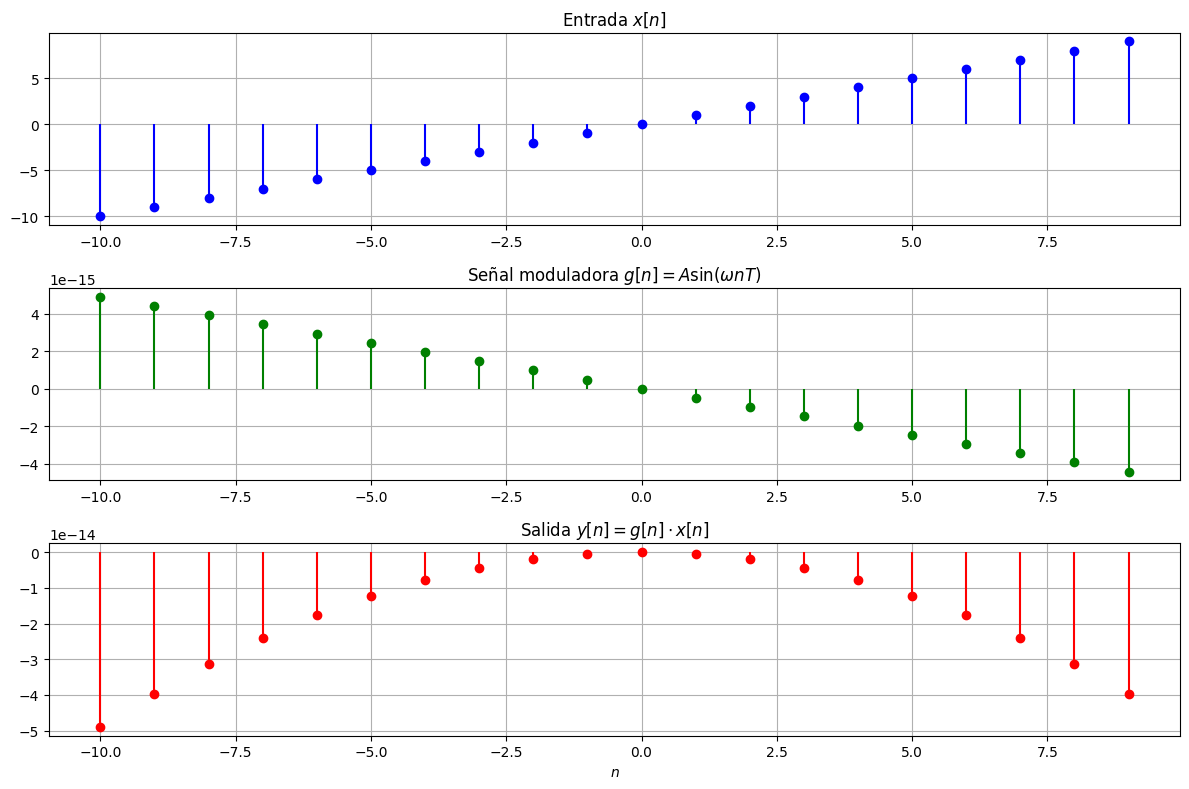

In [ ]:
n = np.arange(-10, 10)
g = 2 * np.sin( 2 * np.pi * 0.5 * n * 2)
                 
x = n
y = g * x


plt.figure(figsize=(20, 12))

plt.subplot(3, 1, 1)
plt.stem(n, x, basefmt=" ", linefmt='b-', markerfmt='bo')
plt.title("Entrada $x[n]$")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.stem(n, g, basefmt=" ", linefmt='g-', markerfmt='go')
plt.title("Señal moduladora $g[n] = A \\sin(\\omega n T)$")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.stem(n, y, basefmt=" ", linefmt='r-', markerfmt='ro')
plt.title("Salida $y[n] = g[n] \\cdot x[n]$")
plt.xlabel("$n$")
plt.grid(True)

plt.tight_layout()
plt.show()


2. $y[n] = \sum\limits_{k=n-n_0}^{n+n_0} x[k]$

    No es causal porque depende de valores $futuros$.

    Es Lineal.

    Posee memoeria.

    Supongamos que desplazamos la entrada:
    $$x_{1}[n] = x[n - n_{1}]$$

    $$y_{1}[n] = \sum\limits_{k = n - n_{0}}^{n + n_0} x_{1}[k] = \sum_{k = n - n_{0}}^{n + n_{0}} x[k - n_{1}] $$
        

    Hacemos un cambio de variable $m = k - n_{1} \Rightarrow k = m + n_{1} $, entonces:

    $$y_1[n] = \sum\limits_{m = n - n_{0} - n_{1}}^{n + n_{0} - n_{1}} x[m] $$

        

    $$y[n] = \sum\limits_{k = n - n_{0}}^{n + n_{0}} x[k]$$
    

    $$y[n - n_{1}] = \sum\limits_{k = n - n_{1} - n_{0}}^{n - n_{1} + n_{0}} x[k]$$
        

    Invariante en el tiempo



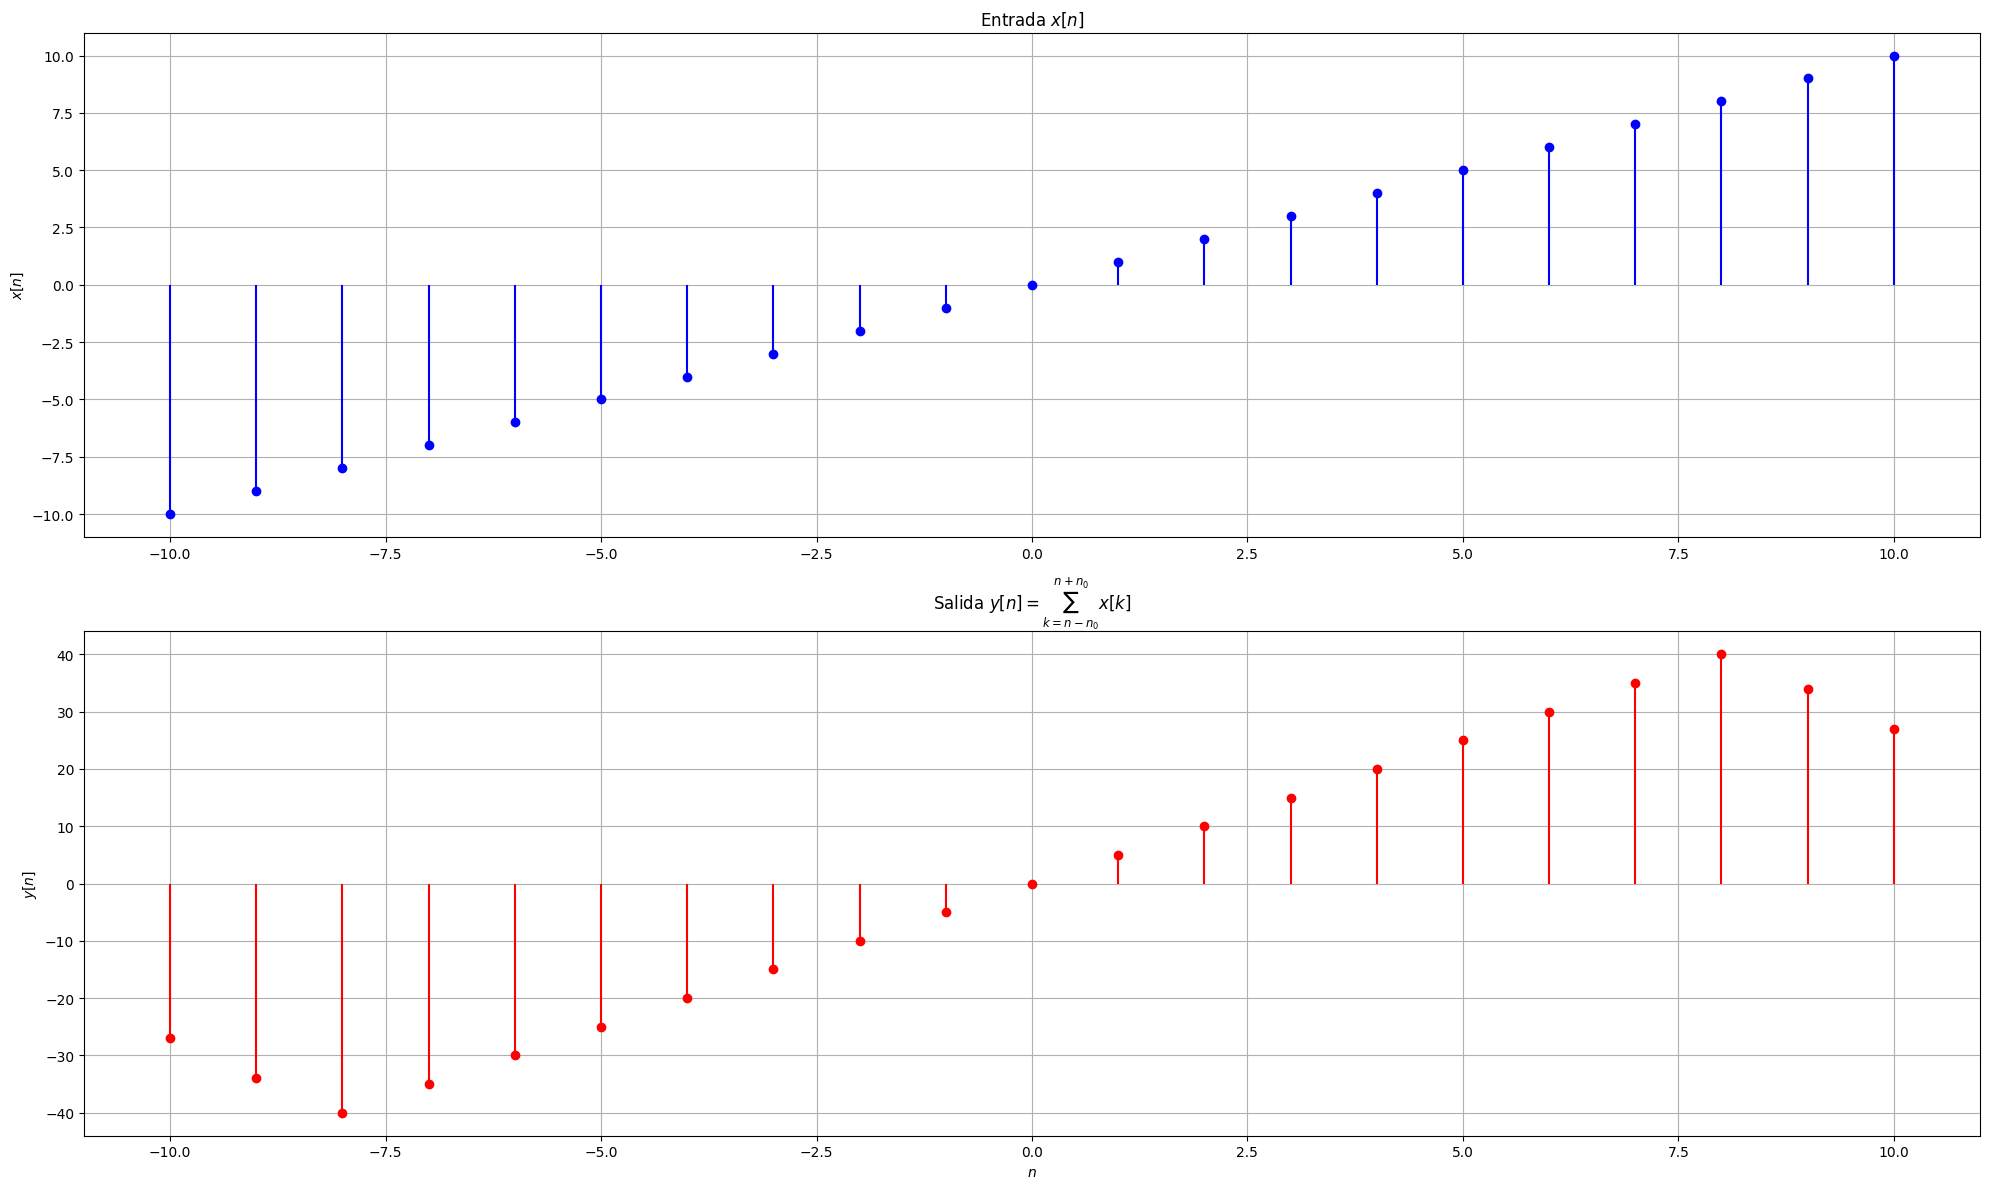

In [20]:
n = np.arange(-10, 11)
n0 = 2  


#x = np.sin(2 * np.pi * n)
x = np.arange(-10, 11)
y = np.zeros_like(n, dtype=float)
for i, ni in enumerate(n):
    indices = (n >= ni - n0) & (n <= ni + n0)
    y[i] = np.sum(x[indices])

plt.figure(figsize=(20, 12))

plt.subplot(2, 1, 1)
plt.stem(n, x, basefmt=" ", linefmt='b-', markerfmt='bo')
plt.title("Entrada $x[n]$")
plt.ylabel("$x[n]$")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.stem(n, y, basefmt=" ", linefmt='r-', markerfmt='ro')
plt.title(r"Salida $y[n] = \sum_{k=n-n_0}^{n+n_0} x[k]$")
plt.xlabel("$n$")
plt.ylabel("$y[n]$")
plt.grid(True)

plt.tight_layout()
plt.show()


3. $y[n] = x[n] + 2$

    ✔Es causal.

    ❌No es lineal.  No cumple superposición
    $$ a.x[n] \ es \ a.y[n] $$
    $$ \alpha y[n] = \alpha x[n] + 2 $$ 
   

    ❌No posee memoria.

    ✔Invariante en el tiempo.

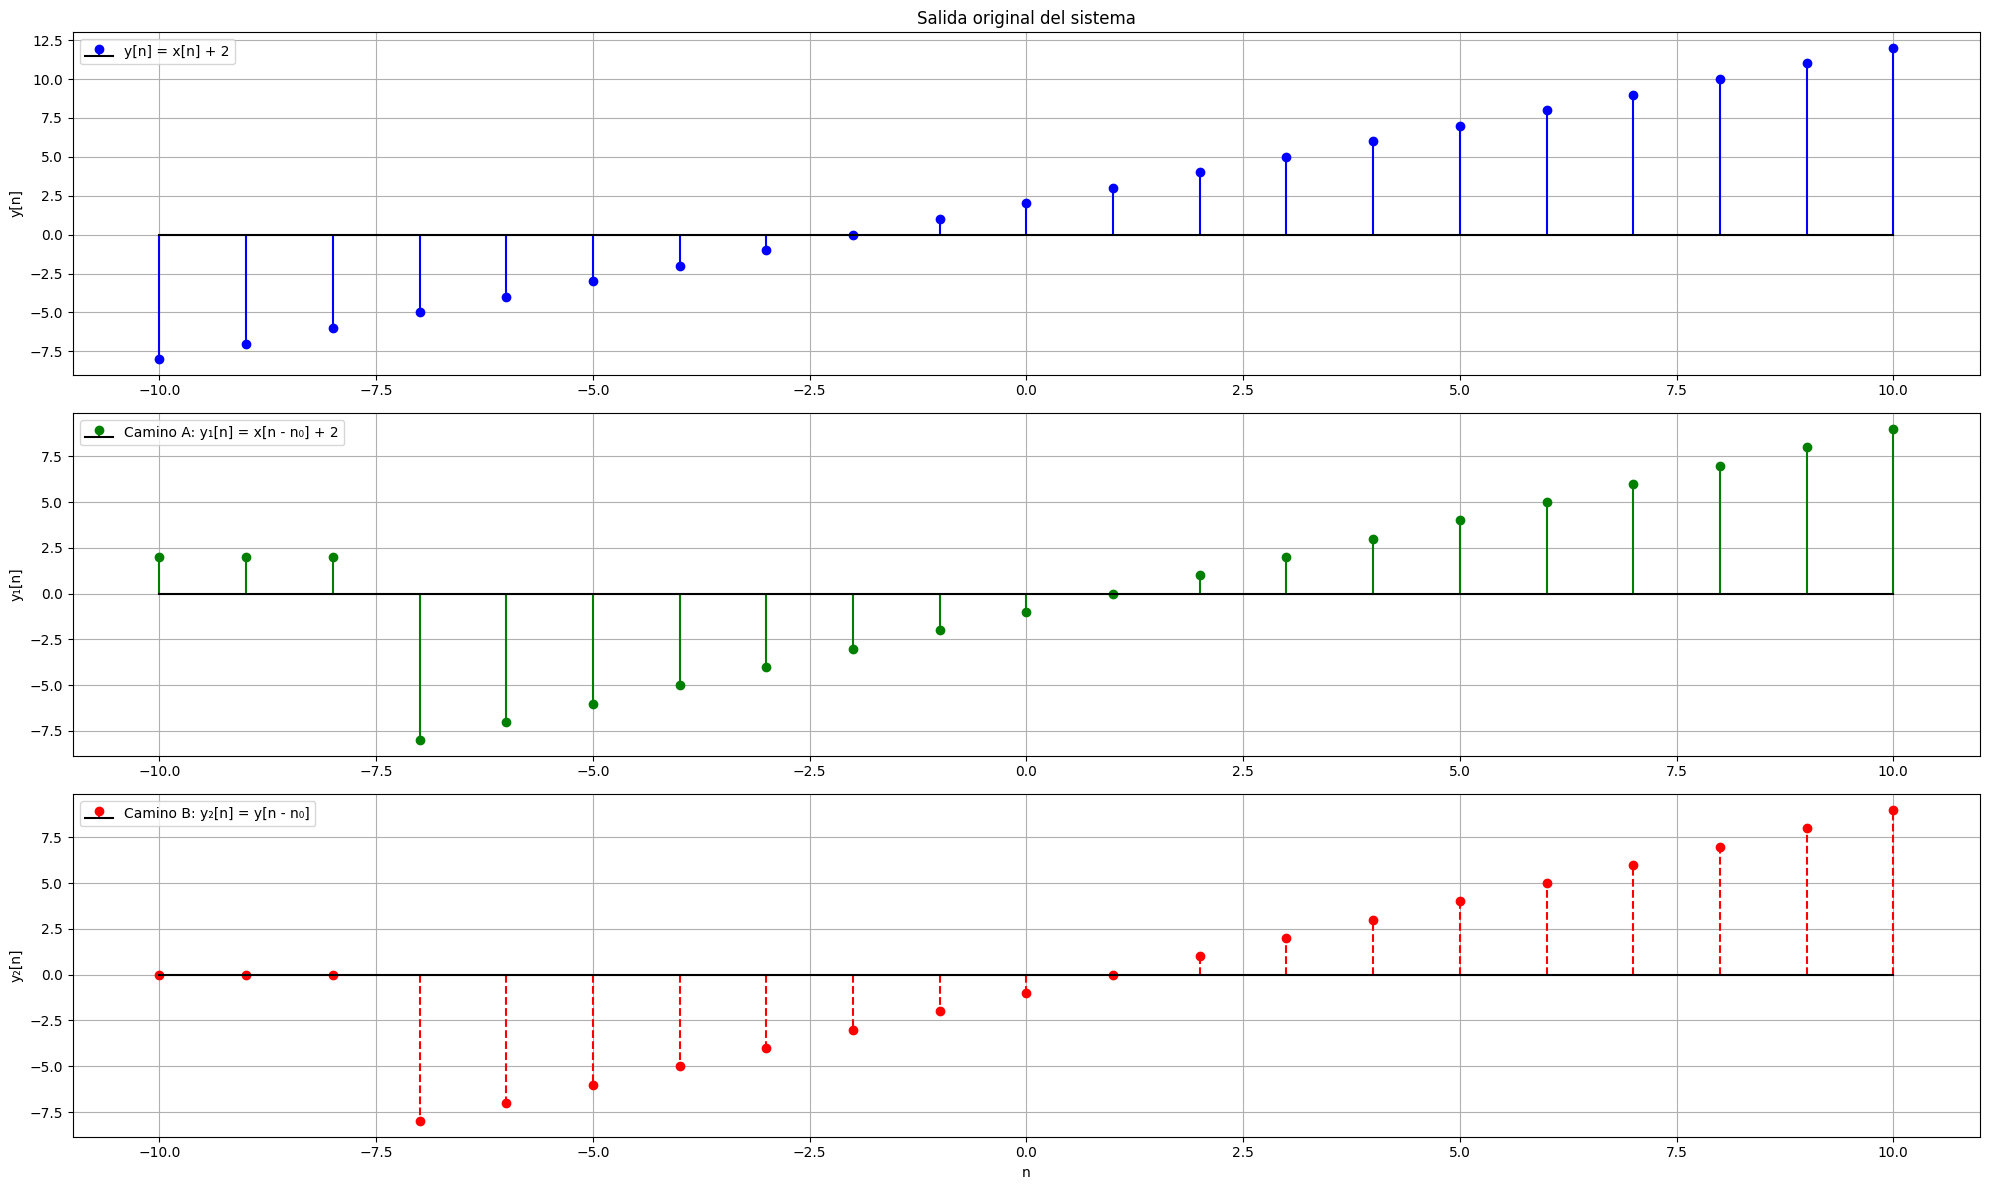

In [ ]:
n = np.arange(-10, 11,1)
desplazamiento = 3 

x = n
y = x + 2 
# Camino A: desplazar la entrada y luego aplicar el sistema
x_shifted = np.roll(x, desplazamiento)         # x[n - n0]
x_shifted[:desplazamiento] = 0                 
y1 = x_shifted + 2                 # y₁[n] = x[n - n₀] + 2

# Camino B: aplicar el sistema y luego desplazar la salida
y2 = np.roll(y, desplazamiento)                # y[n - n0]
y2[:desplazamiento] = 0


plt.figure(figsize=(20, 12))
plt.subplot(3, 1, 1)
plt.stem(n, y, linefmt='b-', markerfmt='bo', basefmt='k-', label='y[n] = x[n] + 2')
plt.title('Salida original del sistema')
plt.ylabel('y[n]')
plt.grid(True)
plt.legend()
plt.subplot(3, 1, 2)
plt.stem(n, y1, linefmt='g-', markerfmt='go', basefmt='k-', label='Camino A: y₁[n] = x[n - n₀] + 2')
plt.ylabel('y₁[n]')
plt.grid(True)
plt.legend()
plt.subplot(3, 1, 3)
plt.stem(n, y2, linefmt='r--', markerfmt='ro', basefmt='k-', label='Camino B: y₂[n] = y[n - n₀]')
plt.xlabel('n')
plt.ylabel('y₂[n]')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


4. $y[n] = n x[n]$

✔Es causal. No depende de futuros valores de $x[n]$

✔Es lineal. Cumple superposición

$$ T{a⋅x_{1}​[n]+b⋅x_{2}​[n]}=n⋅(ax_{1}​[n]+bx_{2}​[n])=a⋅nx_{1}​[n]+b⋅nx_{2}​[n]$$

❌Es invariante en el tiempo 
Desplazando la entrada:
   $$ y1​[n]=T{x[n−n0​]}=n⋅x[n−n0​]$$

Pero si desplazás la salida:

$$y[n−n0]=(n−n0)⋅x[n−n0]$$

Entonces:
$$y1[n]≠y[n−n0]$$


❌No posee memoria. 

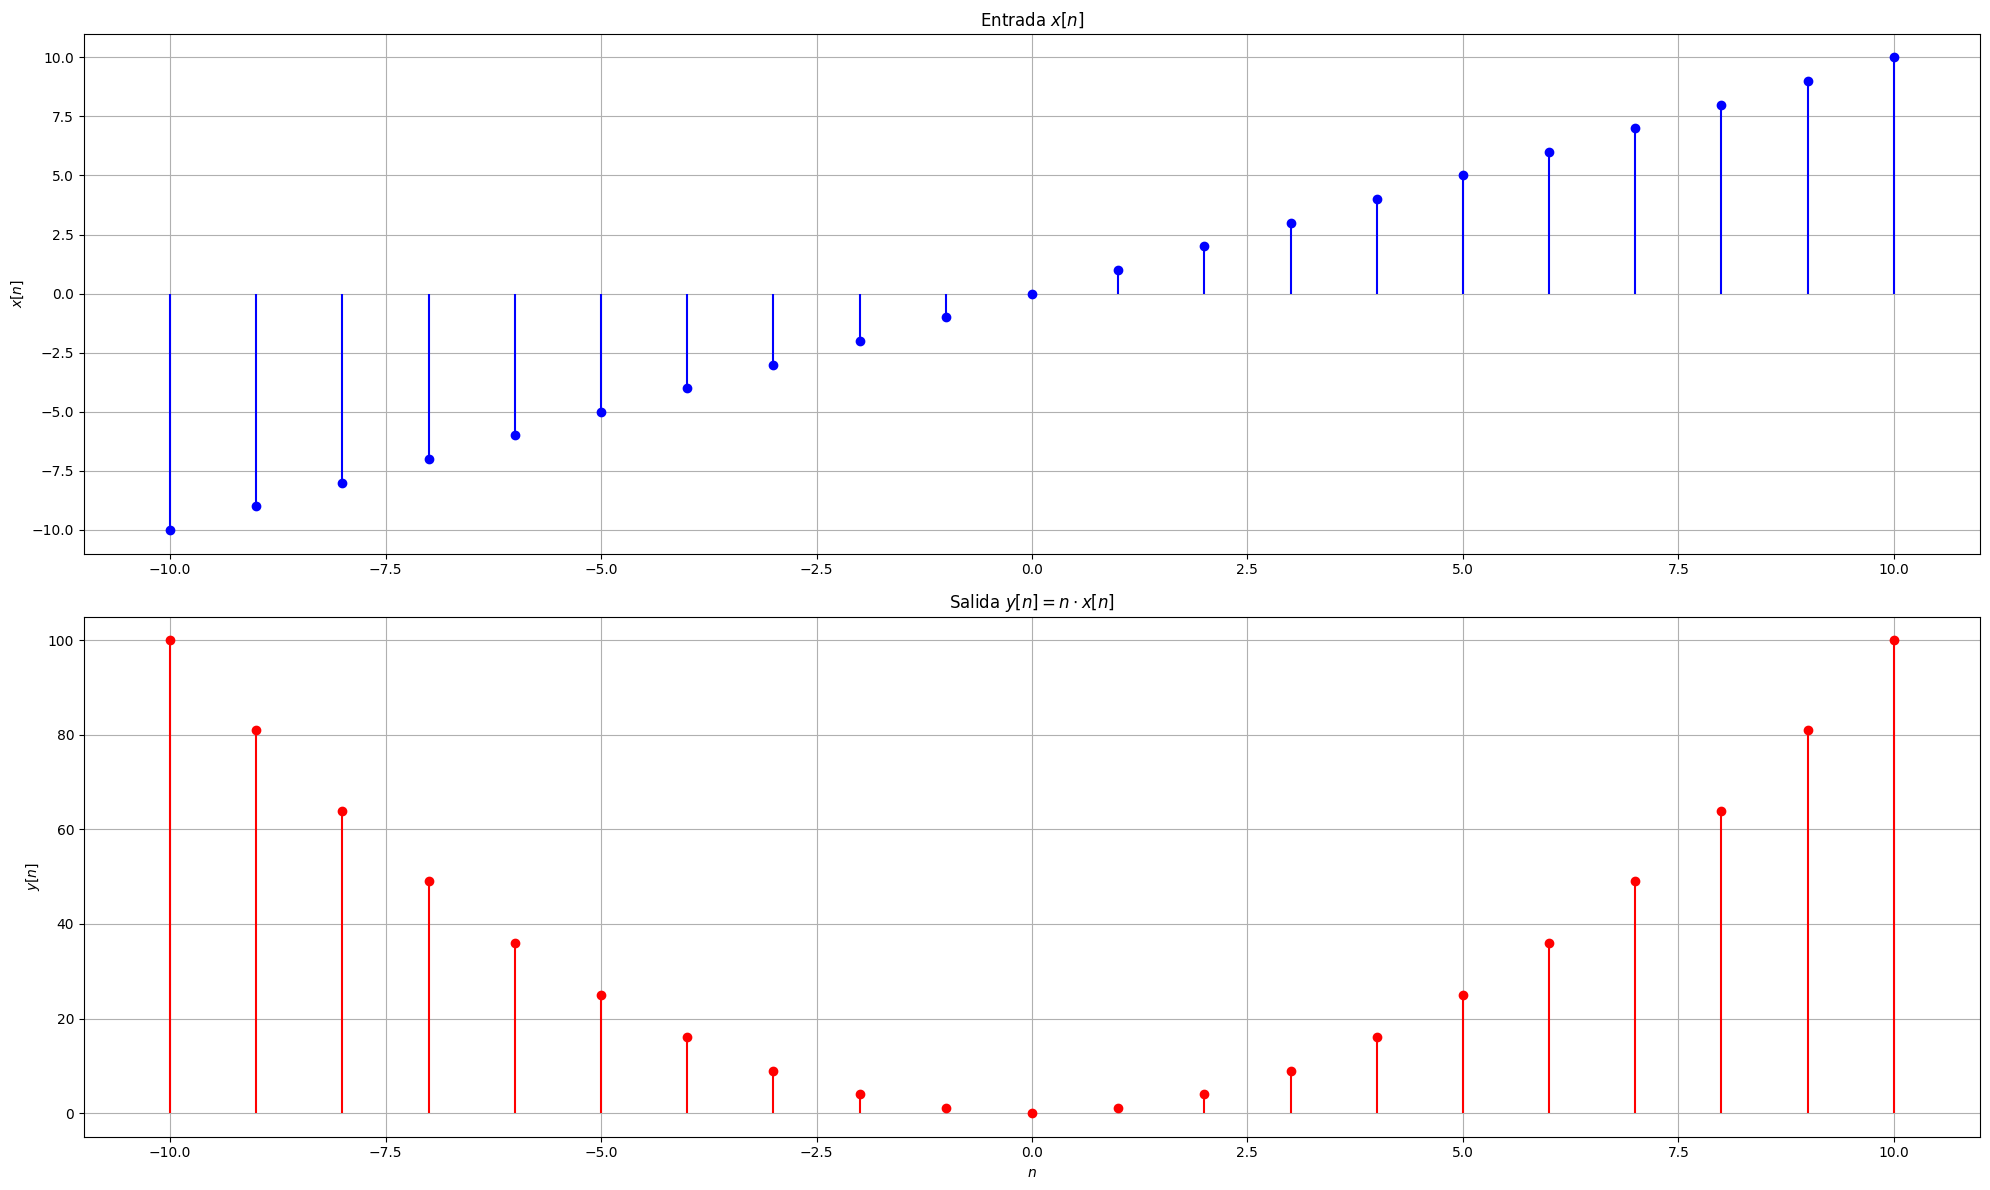

In [19]:
n = np.arange(-10, 11)
x = np.arange(-10, 11)
y = n * x


plt.figure(figsize=(20, 12))

plt.subplot(2, 1, 1)
plt.stem(n, x, basefmt=" ", linefmt='b-', markerfmt='bo')
plt.title("Entrada $x[n]$")
plt.ylabel("$x[n]$")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.stem(n, y, basefmt=" ", linefmt='r-', markerfmt='ro')
plt.title(r"Salida $y[n] = n \cdot x[n]$")
plt.xlabel("$n$")
plt.ylabel("$y[n]$")
plt.grid(True)

plt.tight_layout()
plt.show()


**Ejercicio 2:** Considere el diagrama en bloques de la Figura 1 y encuentre la ecuación en diferencias para la señal de salida $y[n]$ en función de la señal de entrada $x[n]$.

**Ejercicio 3**: Considere el sistema LTI dado por la ecuación en diferencias:

$$
y[n] - 0.5y[n-1] + 0.25y[n-2] = x[n]
$$

(sistema inicialmente en reposo). Encuentre el diagrama en bloques que lo representa.


## Parte 2: Convolución

**Ejercicio 1:** Implemente la convolución lineal mediante una sumatoria de convolución. Pruébela para convolucionar dos señales cualesquiera de longitud $N$ muestras. Compare los resultados con los obtenidos mediante la función `conv(x,y)` y con la función `filter`.

La función `Y = filter(B,A,X)` implementa la ecuación en diferencias, para los coeficientes dados en los vectores $A$ y $B$ y la señal de entrada $X$, según:

$$
a(1) \cdot y(n) = b(1) \cdot x(n) + b(2) \cdot x(n-1) + \dots - a(2) \cdot y(n-1) - \dots
$$

A partir de esto, determine los valores a ingresar en los vectores $A$ y $B$ para obtener la salida esperada.

In [ ]:
import numpy as np
def convolución_lineal(señal_x, señal_h):
    N = len(señal_x)
    M = len(señal_h)
    N_muestras = N + M - 1
    y = np.zeros(N_muestras)
    for n in range(N_muestras):
        suma = 0
        for k in range(N):
            if 0 <= (n - k) < M:
                    suma += señal_x[k] * señal_h[n - k] 
                    print(f"x[{n}] * h[{n - k}] = {señal_x[k]} * {señal_h[n - k]} = {señal_x[k] * señal_h[n - k]}")        
        y[n] = suma
        
    
    return y 

result = convolución_lineal([2,1,.5],[1,2,2])

print("Resultado de la convolución lineal:", result)



x[0] * h[0] = 2 * 1 = 2
x[1] * h[1] = 2 * 2 = 4
x[1] * h[0] = 1 * 1 = 1
x[2] * h[2] = 2 * 2 = 4
x[2] * h[1] = 1 * 2 = 2
x[2] * h[0] = 0.5 * 1 = 0.5
x[3] * h[2] = 1 * 2 = 2
x[3] * h[1] = 0.5 * 2 = 1.0
x[4] * h[2] = 0.5 * 2 = 1.0
Resultado de la convolución lineal: [2.  5.  6.5 3.  1. ]


**Ejercicio 2:** Escriba una función que realice la convolución circular discreta (también llamada convolución periódica) entre dos señales $x[n]$ y $h[n]$, ambas de longitud $N$ muestras, utilizando ciclos `for`. En esta se debe considerar:

- $x[n]$ como periódica
- $h[n]$ nula fuera de su rango de definición

La convolución circular se expresa mediante:

$$
y[k] = \sum_{l=1}^{N} h[l] \cdot x[((N + k - l) \bmod N) + 1] \quad \text{para} \quad 1 \leq k \leq N
$$

donde $mod$ es la operación módulo entero (resto de la división entera).


In [ ]:
import numpy as np
def convolución_circular(señal_x, señal_h , N_muestras):
    y = np.zeros(N_muestras)
    for k in range(0,N_muestras):
        suma = 0
        for l in range(0,N_muestras):
            suma += señal_h[l] * señal_x[(N_muestras + k - l) % N_muestras] 
        y[k] = suma
    
    return y


result = convolución_circular(señal_x = [1,2,3,4],señal_h =[2,1,2,1], N_muestras = 4)

señal_x = [1, 2, 3, 4]
señal_h = [2, 1, 2, 1]
N_muestras = len(señal_x)



plt.figure(figsize=(10, 6))


plt.subplot(3, 1, 1)
plt.stem(range(N_muestras), señal_x, 'r-*', label="Señal x[n]")
plt.title('Señal x[n]')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()


plt.subplot(3, 1, 2)
plt.stem(range(N_muestras), señal_h, 'b-o', label="Señal h[n]")
plt.title('Señal h[n]')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()


plt.subplot(3, 1, 3)
plt.stem(range(N_muestras), result, 'g-s', label="Convolución Circular y[n]")
plt.title('Convolución Circular y[n]')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()